In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
da = xr.open_dataset(r'outputs/global/PU/probability_grids/probability_grid_0Ma.nc')

In [5]:
da

<xarray.Dataset> Size: 1MB
Dimensions:      (lat: 361, lon: 721)
Coordinates:
  * lon          (lon) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
  * lat          (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
    spatial_ref  int64 8B ...
Data variables:
    z            (lat, lon) float32 1MB ...

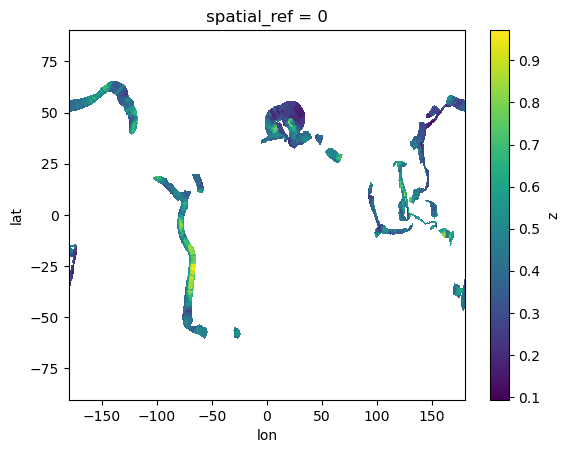

In [7]:
da['z'].plot()

In [9]:
import pandas as pd
df = pd.read_csv(r'extracted_data/grid_data.csv')

In [10]:
df.head()

,lon,lat,present_lon,present_lat,age (Ma),plate_thickness (m),seafloor_spreading_rate (km/Myr),subducting_plate_absolute_velocity (cm/yr),distance_to_trench_edge (degrees),subducted_carbonates_volume (m),...,crustal_thickness_n,crustal_thickness_range (m),magnetic_anomaly_mean (nT),magnetic_anomaly_min (nT),magnetic_anomaly_max (nT),magnetic_anomaly_median (nT),magnetic_anomaly_std (nT),magnetic_anomaly_n,magnetic_anomaly_range (nT),erosion (m)
0,-177.0,-20.5,-177.0,-20.5,0,94143.390656,73.634880,-6.604683,11.103083,0.0,...,46,0.0,14.129077,0.786703,25.049166,14.296936,4.942313,32,24.262462,-0.0
1,-176.5,-24.0,-176.5,-24.0,0,93568.801880,73.264534,-6.423572,8.198811,0.0,...,72,0.0,38.845264,19.172401,52.806683,40.744629,7.175728,32,33.634281,-0.0
2,-176.5,-21.5,-176.5,-21.5,0,94618.558884,73.453230,-6.540543,10.049584,0.0,...,54,0.0,4.872693,-0.281049,10.702326,4.401441,2.932075,32,10.983374,-0.0
3,-176.5,-21.0,-176.5,-21.0,0,94195.365906,66.022770,-6.564282,10.435431,0.0,...,51,0.0,37.085526,28.205235,49.087517,35.657269,5.690818,32,20.882282,-0.0
4,-176.5,-20.5,-176.5,-20.5,0,94395.160675,73.893585,-6.615995,11.292638,0.0,...,49,0.0,-27.097759,-38.202503,-13.009457,-29.062832,7.380995,32,25.193047,-0.0


In [11]:
df.shape

(3643359, 53)

In [18]:
gb = df.groupby('age (Ma)').size()

In [19]:
gb.reset_index()

,age (Ma),0
0,0,12335
1,1,12656
2,2,12616
3,3,12810
4,4,13598
...,...,...
166,166,33365
167,167,33484
168,168,33587
169,169,33473


In [21]:
df.loc[df['age (Ma)'] == 169]['plate_thickness (m)']

3576310    103608.489037
3576311    101303.339005
3576312    101303.339005
3576313    104551.553726
3576314    101303.339005
               ...      
3609778    101303.339005
3609779    101303.339005
3609780    101303.339005
3609781    101303.339005
3609782    101303.339005
Name: plate_thickness (m), Length: 33473, dtype: float64

In [25]:
df2 = df.loc[df['age (Ma)'] == 169]

In [26]:
type(df2)

pandas.core.frame.DataFrame

<Axes: xlabel='present_lon', ylabel='present_lat'>

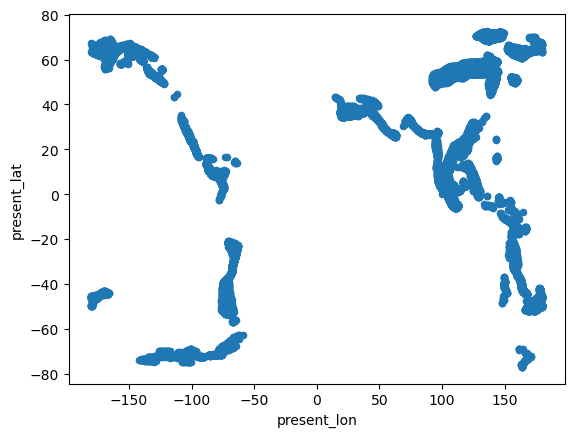

In [27]:
df2.plot.scatter(x='present_lon',y='present_lat')